In [2]:
import wrf_management.project_global_constants as gc
import wrf_management.utilities as ut
import os 
import pandas as pd 
import xarray as xr
import di_python.ya_esta as ye

In [3]:
path = os.path.join(gc.PATH_DATA,'runs/run_2019_02_20/2017_12_10/ungrib_lake/')
paths = mp,mps,mt = 'met_pre','met_pre_sur','met_tav'
pdic={}
for m in paths:
    pdic[m]={}
    pdic[m]['n']=m
    pdic[m]['p']=os.path.join(path,m)
df = pd.DataFrame(pdic).T
df

,n,p
met_pre,met_pre,/tmp/wrf_management/data_folder/runs/run_2019_...
met_pre_sur,met_pre_sur,/tmp/wrf_management/data_folder/runs/run_2019_...
met_tav,met_tav,/tmp/wrf_management/data_folder/runs/run_2019_...


In [4]:
for m in paths:
    fs = os.listdir(pdic[m]['p'])
    dff = pd.DataFrame(fs,columns=['file'])
    dff = dff[dff.file.str.startswith('met_em.d0')]
    dff =dff.sort_values('file')
    pdic[m]['f']=dff

In [5]:
m = mp
for m in paths:
    fp = os.path.join(pdic[m]['p'],pdic[m]['f'].iloc[0].file)
    xa=xr.open_dataset(fp)
    pdic[m]['vars']=list(xa.variables)

In [6]:
s1 = pdic[mt]['vars']
s2 = pdic[mps]['vars']
set(s1).difference(set(s2))

{'TAVGSFC'}

/tmp/wrf_management/data_folder/runs/run_2019_02_20/2017_12_10/ungrib_lake/
/tmp/wrf_management/data_folder/runs/run_2019_02_20/2017_12_10/ungrib_lake/met_em.d01.2017-12-10_06:00:00.nc


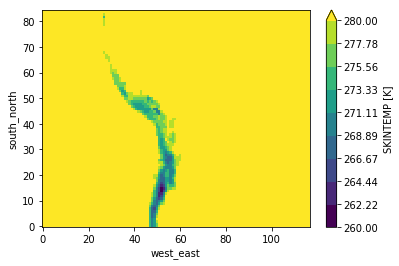

In [7]:
path = os.path.join(gc.PATH_DATA,'runs/run_2019_02_20/2017_12_10/ungrib_lake/')
print(path)

fs = os.listdir(path)
df = pd.DataFrame(fs,columns=['file'])
df = df[df.file.str.startswith('met_em.d01')]
df

file =df.iloc[0].file
file = os.path.join(path,file)
print(file)


vm,vM = 260,280
xa = xr.open_dataset(file)
xa.SKINTEMP.plot(levels=10, vmin=vm,vmax=vM)

In [8]:
xa.NUM_METGRID_SOIL_LEVELS

4

<xarray.DataArray 'TAVGSFC' (Time: 1, south_north: 204, west_east: 252)>
array([[[217.38135, 217.36044, ..., 222.8649 , 222.72733],
        [217.35585, 217.33484, ..., 222.99638, 222.86496],
        ...,
        [215.26306, 214.52817, ..., 221.51195, 221.51082],
        [214.51501, 213.75223, ..., 221.58008, 221.55338]]], dtype=float32)
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    units:        K
    description:  Temperature
    stagger:      M
    sr_x:         1
    sr_y:         1


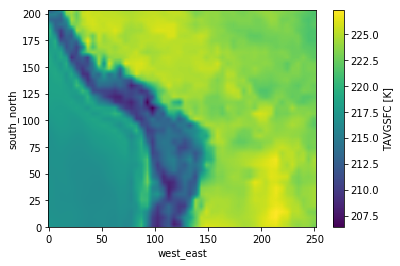

In [225]:
with xa['TAVGSFC'] as a :
    a.plot()
    print(a)


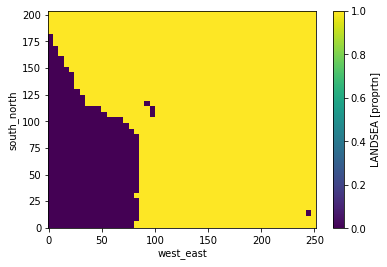

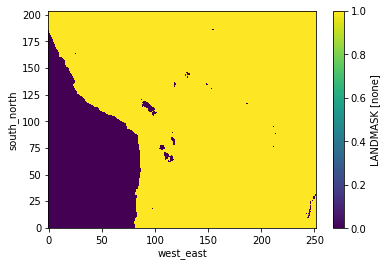

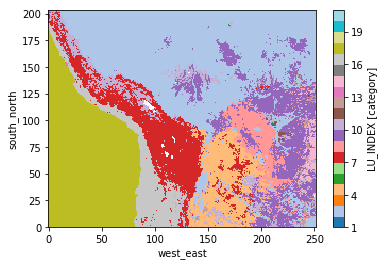

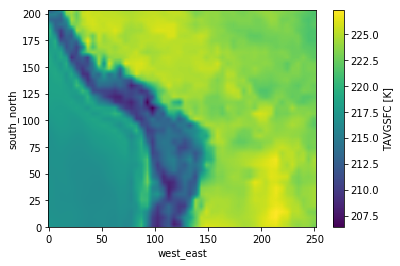

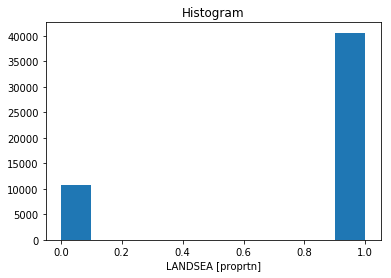

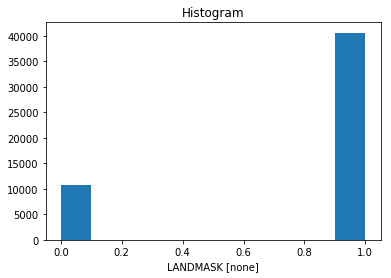

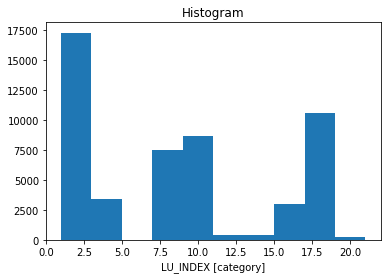

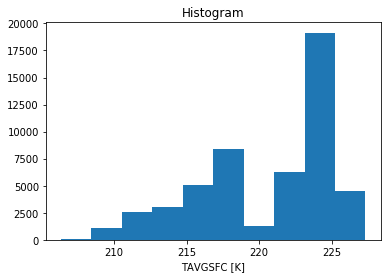

In [228]:
pls='LANDSEA','LANDMASK','LU_INDEX','TAVGSFC'
ops={},{},{'levels':21,'cmap':'tab20'},{}
for i in range(len(pls)):
    fig,ax = plt.subplots()
    xa[pls[i]].plot(**ops[i])
for i in range(len(pls)):
    fig,ax = plt.subplots()
    xa[pls[i]].plot.hist()

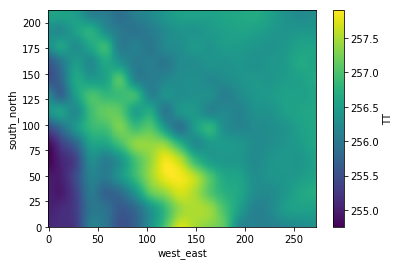

In [222]:
x1 = xa['TT'].mean('num_metgrid_levels')[0]
x1
x1.plot()

/Users/diego/wrf_management/wrf_management/tucu-april-rm-data
/Users/diego/wrf_management/wrf_management/tucu-april-rm-data/met_em.d03.2018-04-06_12:00:00.nc


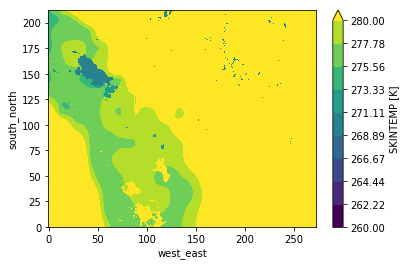

In [81]:
path1 = os.path.join('/Users/diego/wrf_management/wrf_management/tucu-april-rm-data')
print(path1)

fs = os.listdir(path1)
df = pd.DataFrame(fs,columns=['file'])
df = df[df.file.str.startswith('met_em.d03')]
df

file =df.iloc[1].file
file = os.path.join(path1,file)
print(file)

os.path.isfile(file)

xa = xr.open_dataset(file)
xa.SKINTEMP.plot(levels=10,  vmin=vm,vmax=vM)

In [229]:
xa

<xarray.Dataset>
Dimensions:      (Time: 1, num_metgrid_levels: 38, num_sm_layers: 4, num_st_layers: 4, south_north: 204, south_north_stag: 205, west_east: 252, west_east_stag: 253, z-dimension0012: 12, z-dimension0016: 16, z-dimension0021: 21)
Dimensions without coordinates: Time, num_metgrid_levels, num_sm_layers, num_st_layers, south_north, south_north_stag, west_east, west_east_stag, z-dimension0012, z-dimension0016, z-dimension0021
Data variables:
    Times        (Time) |S19 ...
    SOIL_LAYERS  (Time, num_st_layers, south_north, west_east) float32 ...
    SM           (Time, num_sm_layers, south_north, west_east) float32 ...
    ST           (Time, num_st_layers, south_north, west_east) float32 ...
    SNOW         (Time, south_north, west_east) float32 ...
    SKINTEMP     (Time, south_north, west_east) float32 ...
    LANDSEA      (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 1.0 1.0
    SEAICE       (Time, south_north, west_east) float32 ...
    ST100200     (Time, s

In [9]:
st='cdas1.t18z.splgrbf06.grib2'

In [12]:
't18' in st


True